# Churn Analysis and Prediction for - GeniusAI

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns


In [4]:

data = pd.read_csv("taskdata.csv")

In [6]:
data.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.0,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.0,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.0,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.0,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.5,48.230769,1.692308,17.461538,25.769231,0.230769,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

### Data Dictionary


1.	user_id                               	
2.	account_id	
3.	max_return_days-->	 Maximum number of days in which user made a re-purchase
4.	average_return_days	--> Average number of days in which user made a purchase
5.	customer_since_months--> 	 No of months since user started paying
6.	total_revenue	--> Total revenue made from this user
7.	average_revenue	--> Average revenue made from this user
8.	avg_vas_count	--> Average amount of vas counts
9.	avg_used_vas_value	--> Average number of vas used by the user
10.	business_type	--> Business type
11.	avg_wallet_bonus-->	 Average bonus amount in wallet
12.	avg_active_ads	--> Average no of active ads
13.	avg_new_ads	--> Average no of new ads
14.	avg_email_replies	--> Average no of email replies
15.	avg_call_replies	--> Average no of call replies
16.	avg_sms_replies -->	 Average no of sms replies
17.	target	--> If user stays or leaves



In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,4407.0,4.106655e+09,6.794948e+09,410039.0,6.184510e+08,7.296626e+08,7.292936e+09,7.356031e+10
account_id,4400.0,5.065539e+02,3.260728e+02,111.0,2.260000e+02,4.930000e+02,1.005000e+03,1.017000e+03
max_return_days,4407.0,2.233560e+01,4.359125e+01,1.0,1.000000e+00,2.000000e+00,3.000000e+01,3.540000e+02
average_return_days,4407.0,7.171576e+00,1.920909e+01,0.5,1.000000e+00,1.076923e+00,5.666667e+00,3.540000e+02
customer_since_months,4407.0,9.874064e+00,5.169639e+00,1.0,5.000000e+00,1.200000e+01,1.400000e+01,2.400000e+01
total_revenue,4407.0,1.941304e+02,1.548362e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.395717e+04
average_revenue,4407.0,1.694262e+01,1.282688e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.852727e+03
avg_vas_count,4407.0,3.249388e+00,5.509869e+00,0.0,1.428571e-01,2.000000e+00,4.333333e+00,1.565833e+02
avg_used_vas_value,4407.0,7.211901e+01,1.170195e+02,0.0,2.727273e+00,4.500000e+01,1.000000e+02,3.357500e+03
business_type,4407.0,4.978443e-01,1.199725e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


Business Types is int value ranging from 0 to 5 should convverted to object datatype


In [13]:
data.isna().sum()

user_id                  0
account_id               7
max_return_days          0
average_return_days      0
customer_since_months    0
total_revenue            0
average_revenue          0
avg_vas_count            0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_call_replies         0
avg_sms_replies          0
target                   0
dtype: int64

### No missing value

In [14]:
data.isnull().mean()

user_id                  0.000000
account_id               0.001588
max_return_days          0.000000
average_return_days      0.000000
customer_since_months    0.000000
total_revenue            0.000000
average_revenue          0.000000
avg_vas_count            0.000000
avg_used_vas_value       0.000000
business_type            0.000000
avg_wallet_bonus         0.000000
avg_active_ads           0.000000
avg_new_ads              0.000000
avg_email_replies        0.000000
avg_call_replies         0.000000
avg_sms_replies          0.000000
target                   0.000000
dtype: float64

In [16]:
data.shape

(4407, 17)

14 Independent variable

1 Dependent variable

In [18]:
data['target'].value_counts()

0    3952
1     455
Name: target, dtype: int64

In [22]:
data['target'].value_counts(normalize=True)

0    0.896755
1    0.103245
Name: target, dtype: float64

Target Imbalance in the data.
* Not Churned 89 %
* Churned 10 %

In [23]:
data['business_type']= data['business_type'].astype('category')

In [24]:
data.dtypes

user_id                     int64
account_id                float64
max_return_days             int64
average_return_days       float64
customer_since_months       int64
total_revenue             float64
average_revenue           float64
avg_vas_count             float64
avg_used_vas_value        float64
business_type            category
avg_wallet_bonus          float64
avg_active_ads            float64
avg_new_ads               float64
avg_email_replies         float64
avg_call_replies          float64
avg_sms_replies           float64
target                      int64
dtype: object

In [28]:
cat_features = ['business_type']
num_features = ['max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies']

In [29]:
data.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

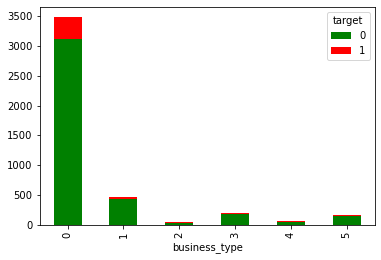

In [34]:
import matplotlib.pyplot as plt
for i in cat_features[:]:
    ct = pd.crosstab(columns=data[i],index=data["target"])
    ct.T.plot(kind="bar",stacked=True,color=["green","red"])
    plt.show()

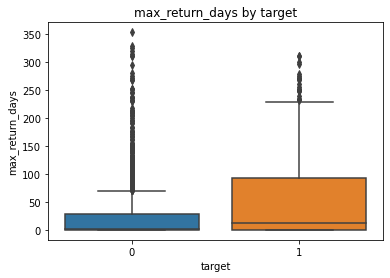

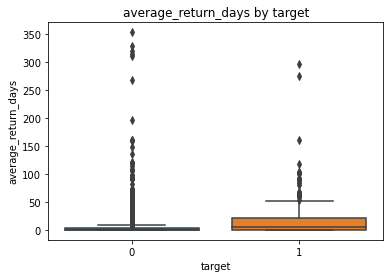

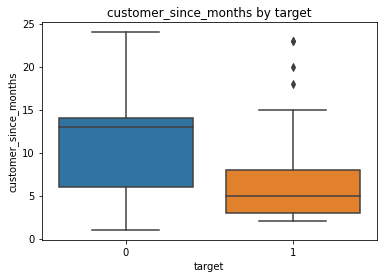

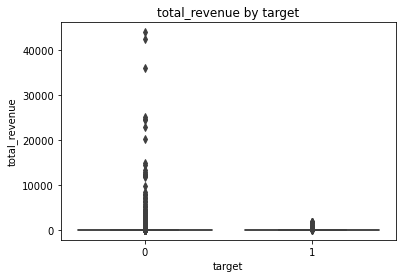

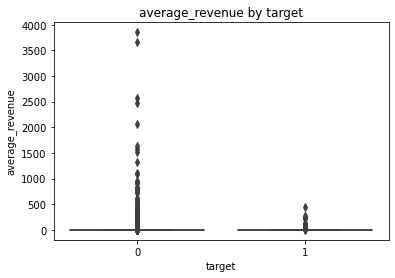

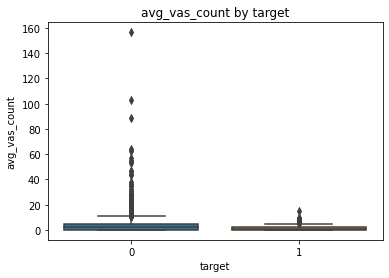

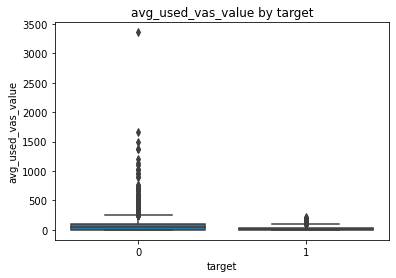

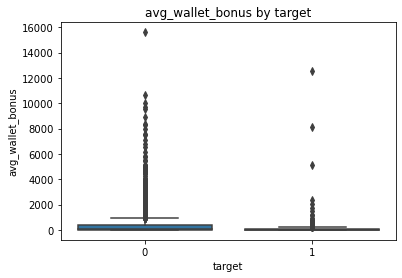

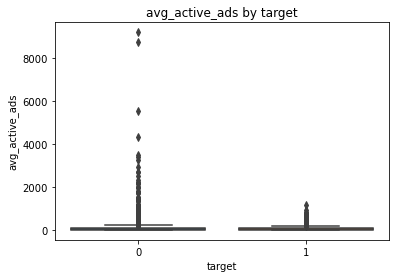

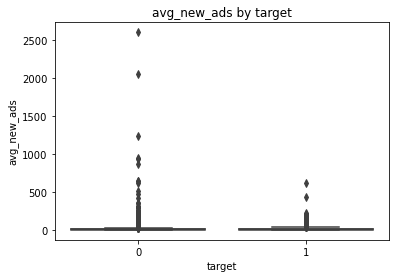

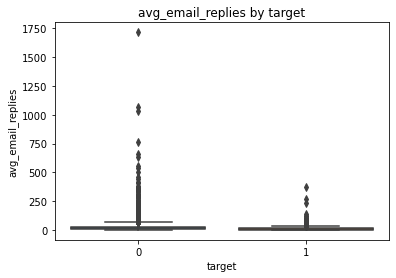

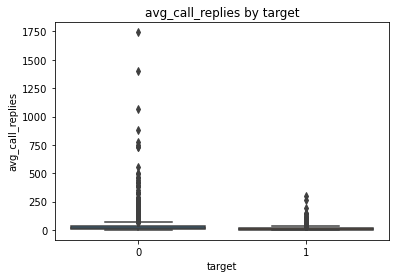

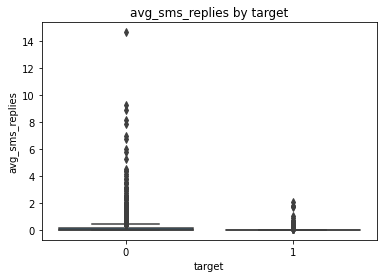

In [35]:
for i in num_features:
    sns.boxplot(x="target",y=i,data=data)
    plt.title(i+" by "+"target")
    plt.show()

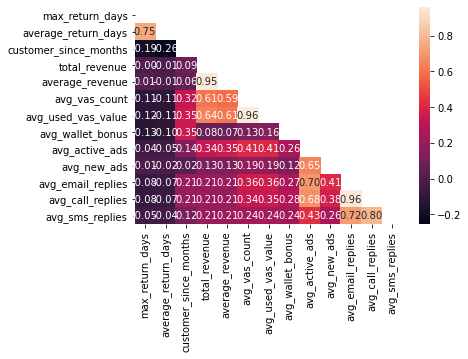

In [36]:
# Correlation plot
sns.heatmap(data[num_features].corr(),annot=True,fmt=".2f",mask=np.triu(data[num_features].corr()))
plt.show()

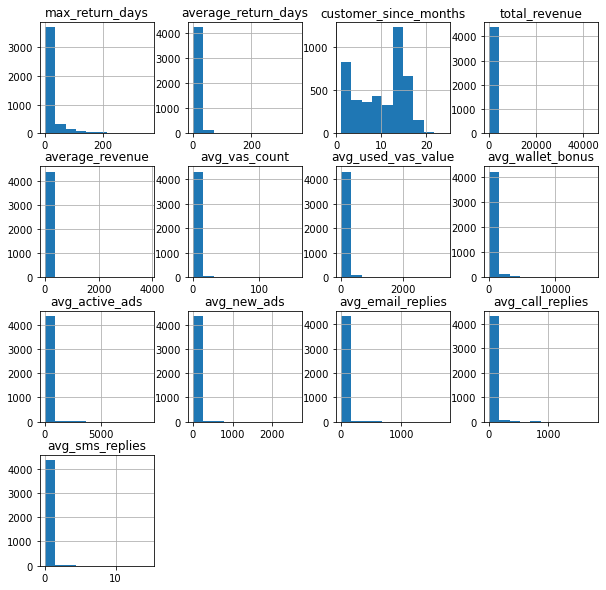

In [37]:
data[num_features].hist(figsize=(10,10))
plt.show()

In [40]:
data_predictors = pd.get_dummies(data)

In [41]:
data_predictors.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies', 'target', 'business_type_0',
       'business_type_1', 'business_type_2', 'business_type_3',
       'business_type_4', 'business_type_5'],
      dtype='object')

In [49]:
X = data_predictors[['max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies', 'business_type_0',
       'business_type_1', 'business_type_2', 'business_type_3',
       'business_type_4', 'business_type_5']]
y = data[['target']]

Finding feature importance with RandomForestClassifier.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
rf = RandomForestClassifier(n_estimators=5000,random_state=11)
rf.fit(X,y)
feat_imp = pd.DataFrame(rf.feature_importances_)
feat_imp.index = pd.Series(data_predictors[['max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies', 'business_type_0',
       'business_type_1', 'business_type_2', 'business_type_3',
       'business_type_4', 'business_type_5']].columns)
feat_imp = (feat_imp*100).copy().sort_values(by=0,ascending=False)
feat_imp = feat_imp.reset_index()
feat_imp

C:\Users\Acer\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,index,0
0,customer_since_months,11.737218
1,max_return_days,11.236073
2,avg_active_ads,11.122145
3,avg_new_ads,10.311033
4,average_return_days,9.424276
5,avg_call_replies,9.247341
6,avg_email_replies,9.051946
7,avg_used_vas_value,6.872925
8,avg_vas_count,6.032430
9,avg_wallet_bonus,4.500684


From the above feature importance data frame, it is better to try different models by backward eliminating the unimportant features. Initially the models are built without SMOTE. RFE can also be used for feature selection.

Since the class is imbalance F1 score would be an appropriate metric instead of accuracy

### NO SMOTE


In [51]:
feat_imp.shape[0]

19

In [52]:
for var in np.arange(feat_imp.shape[0],6,-1):
    X_new = X[feat_imp.iloc[:var,0]].copy()
    X_train, X_test, y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=11)
    final_rf = RandomForestClassifier(random_state=11)
    gscv = GridSearchCV(estimator=final_rf,param_grid={
        "n_estimators":[100,500,1000,5000],
        "criterion":["gini","entropy"]
    },cv=5,n_jobs=-1,scoring="f1_weighted")

    model = gscv.fit(X_train,y_train)
    print(str(var)+" variables:  "+str(model.best_estimator_)+"  F1 score: "+str(model.best_score_))

D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


19 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.8902701285634738


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


18 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.8898773154710554


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


17 variables:  RandomForestClassifier(random_state=11)  F1 score: 0.8909733992967628


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


16 variables:  RandomForestClassifier(n_estimators=500, random_state=11)  F1 score: 0.8925479440740102


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


15 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.8902285068523316


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


14 variables:  RandomForestClassifier(random_state=11)  F1 score: 0.8899840156023247


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


13 variables:  RandomForestClassifier(random_state=11)  F1 score: 0.8890874587891906


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


12 variables:  RandomForestClassifier(n_estimators=500, random_state=11)  F1 score: 0.8839892895559354


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


11 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.8782719935238973


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


10 variables:  RandomForestClassifier(criterion='entropy', random_state=11)  F1 score: 0.8785603959399078


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


9 variables:  RandomForestClassifier(n_estimators=1000, random_state=11)  F1 score: 0.8779297630205092


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


8 variables:  RandomForestClassifier(criterion='entropy', random_state=11)  F1 score: 0.8764611869323942


D:\Study\Great Lakes\INtro to python\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


7 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.8790146548129746


Best model f1 score was given by 16 variables

### Shap model explainability

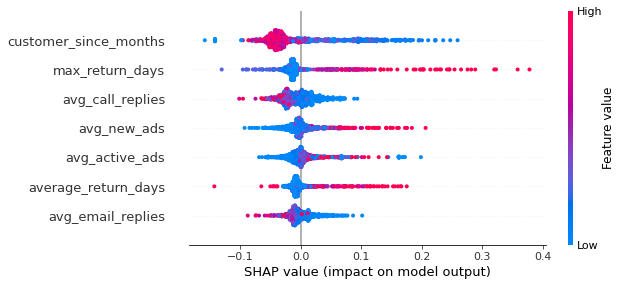

In [56]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
model1 = gscv.best_estimator_
explainer = shap.TreeExplainer(model1)


# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

* When plotting, we call shap_values[1]. In this case, we index in to get the SHAP values for the prediction of "True" ie. churned customers.

### As we can see from the plot the customer churn rate can be highly explained by the model with customer_since_months

### SMOTE

SMOTE stands for 'Synthetic Minority Oversampling Technique' is an oversampling technique of the minority category. SMOTE generates synthetic samples to brings the count of the categories in the training target variable to the same number

In [57]:
for var in np.arange(feat_imp.shape[0],6,-1):
    X_new = X[feat_imp.iloc[:var,0]].copy()
    X_train, X_test, y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=11)
    smote = SMOTE(random_state = 11) 
    X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train.values.ravel())
    final_rf = RandomForestClassifier(random_state=11)
    gscv = GridSearchCV(estimator=final_rf,param_grid={
        "n_estimators":[100,500,1000,5000],
        "criterion":["gini","entropy"]
    },cv=5,n_jobs=-1,scoring="f1_weighted")

    model = gscv.fit(X_train_smote,y_train_smote)
    print(str(var)+" variables:  "+str(model.best_estimator_)+"  F1 score: "+str(model.best_score_))

19 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.9320245683412931
18 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.9304478901780602
17 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.9290259784925328
16 variables:  RandomForestClassifier(criterion='entropy', random_state=11)  F1 score: 0.9271281780960479
15 variables:  RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=11)  F1 score: 0.9285451905016915
14 variables:  RandomForestClassifier(criterion='entropy', n_estimators=5000, random_state=11)  F1 score: 0.927749096458448
13 variables:  RandomForestClassifier(random_state=11)  F1 score: 0.9236424801174998
12 variables:  RandomForestClassifier(criterion='entropy', random_state=11)  F1 score: 0.9230006188356195
11 variables:  RandomForestClassifier(criterion='entropy', n_estimators=1000, r

As seen above, SMOTE has brought a drastic improvement in the model score.

The best model is the one with all 19 variables but can be overfitting. As we can see with with 9 variable there is a increase in the F1 score.

Below we build the final model with 9 variables

In [58]:
X_new = X[feat_imp.iloc[:9,0]].copy()
X_train, X_test, y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=11)
smote = SMOTE(random_state = 11) 
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train.values.ravel())
final_rf = RandomForestClassifier(random_state=11)
gscv = GridSearchCV(estimator=final_rf,param_grid={
    "n_estimators":[100,500,1000,5000],
    "criterion":["gini","entropy"]
},cv=5,n_jobs=-1,scoring="f1_weighted")

model = gscv.fit(X_train_smote,y_train_smote)
FINAL_MODEL = model.best_estimator_

In [59]:
pred = FINAL_MODEL.predict(X_test)

In [60]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       787
           1       0.41      0.55      0.47        95

    accuracy                           0.87       882
   macro avg       0.68      0.73      0.70       882
weighted avg       0.89      0.87      0.87       882



Weighted F1-score in CV is 0.9248 while on the test set is 0.92. Hence, there is no overfitting.

As we used Stratified K Fold in Grid Search. This may ensure a stable model with similar scores in the production as well.

Text(0.5, 15.0, 'Prediction')

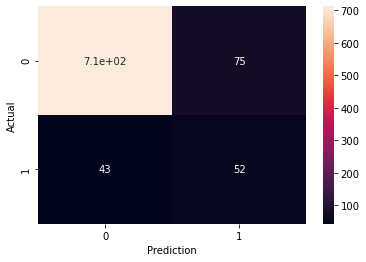

In [61]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.ylabel("Actual")
plt.xlabel("Prediction")

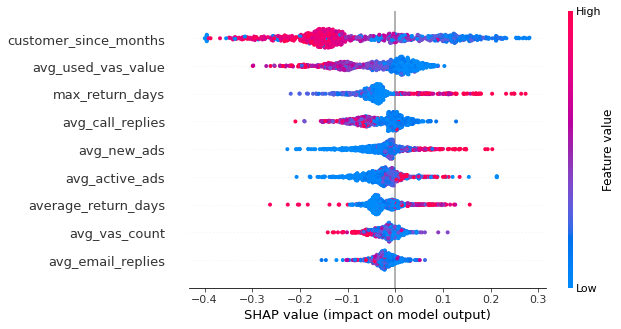

In [62]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
model1 = gscv.best_estimator_
explainer = shap.TreeExplainer(model1)


# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

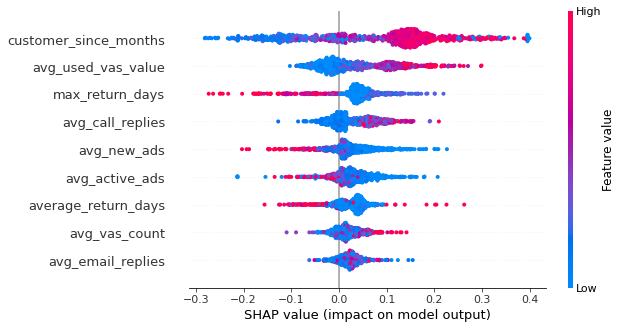

In [63]:
# Make plot. Index of [0] is explained in text below.
shap.summary_plot(shap_values[0], X_test)

In [71]:
# Import pickle Package

import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "RF_Model1.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model1, file)

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

### XGBOOST

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

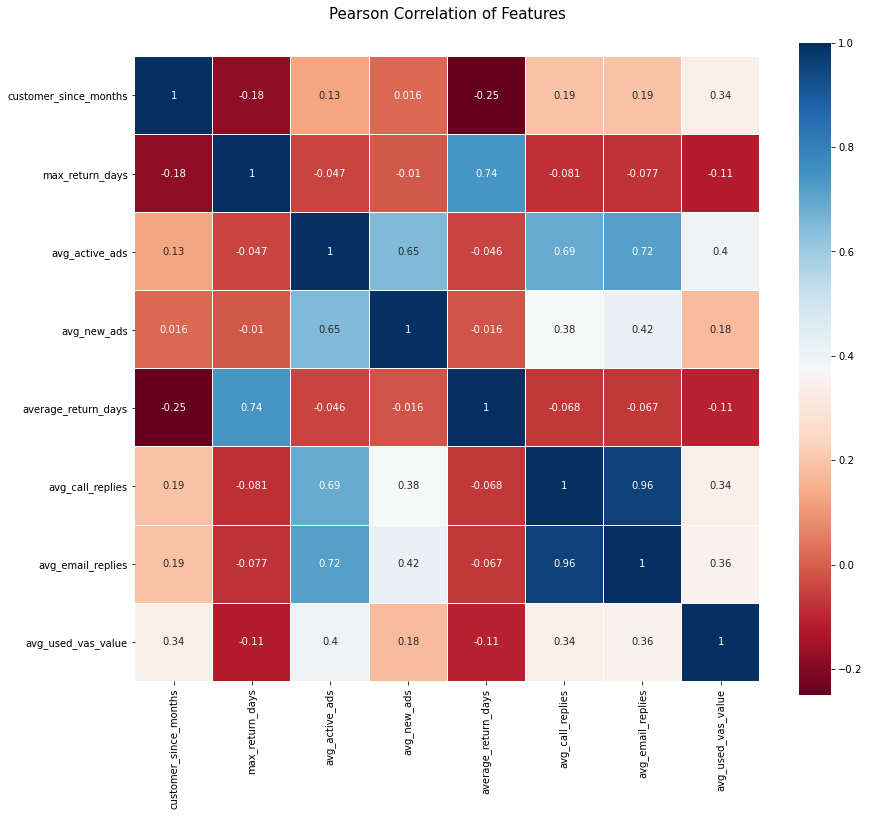

In [72]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [76]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
# Prepare the inputs for the model
for var in np.arange(feat_imp.shape[0],6,-1):
    X_new = X[feat_imp.iloc[:var,0]].copy()
    X_train, X_test, y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=11)
    smote = SMOTE(random_state = 11) 
    X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train.values.ravel())
    #final_rf = RandomForestClassifier(random_state=11)
    xgbm = xgb.XGBClassifier(random_state=11)
    parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              #'missing':[-999],
              'seed': [1337]}
    clf = GridSearchCV(xgbm, parameters, n_jobs=5, 
                   cv=StratifiedKFold(n_splits=5, shuffle=True), 
                   scoring="f1_weighted",
                   verbose=2, refit=True)

    model = clf.fit(X_train_smote,y_train_smote)
    print(str(var)+" variables:  "+str(model.best_estimator_)+"  F1 score: "+str(model.best_score_))
    

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:   21.1s remaining:   31.7s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   21.1s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:   21.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


[09:53:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


19 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_param

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished



[09:53:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


17 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_para

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:53:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


16 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_param

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[09:53:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


14 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subs

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:53:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


13 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_param

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished



[09:53:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


11 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_para

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s


[09:53:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


10 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_param

[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.



[09:53:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


8 variables:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=11, missing=-999, monotone_constraints='()',
              n_estimators=5, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=1, subsample=0.8, tree_method='exact',
              validate_param

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.0s finished


In [77]:
FINAL_MODEL = model.best_estimator_
pred = FINAL_MODEL.predict(X_test)

In [79]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       787
           1       0.23      0.61      0.34        95

    accuracy                           0.74       882
   macro avg       0.59      0.69      0.59       882
weighted avg       0.87      0.74      0.79       882



In [82]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred)
print(cf_matrix)

[[598 189]
 [ 37  58]]


Text(0.5, 15.0, 'Prediction')

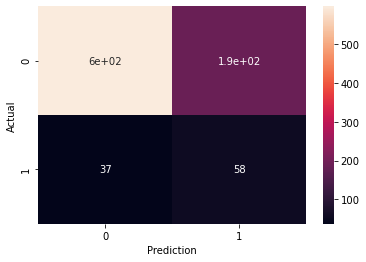

In [83]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.ylabel("Actual")
plt.xlabel("Prediction")

<AxesSubplot:>

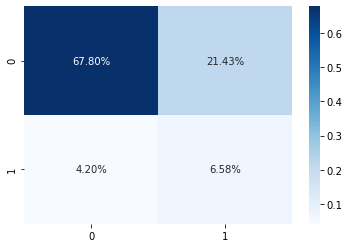

In [84]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

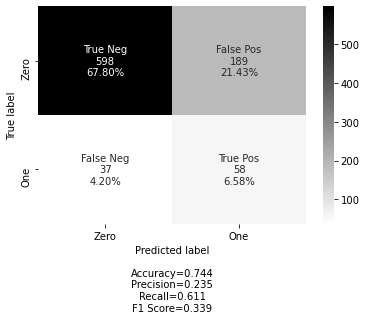

In [90]:
from utils_cf_matrix import make_confusion_matrix
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap='binary')

In [ ]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
# compute SHAP values
# train XGBoost model
xgb = xgb.XGBClassifier(random_state=42)
mymodel = xgb.fit(X, y)
mybooster = mymodel.get_booster()

model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun
# Shap explainer initilization
shap_ex = shap.TreeExplainer(mybooster)

#model1 = xgb.XGBClassifier().fit(X.values, y.values)
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X)


# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)